# Analysis on Titanic dataset

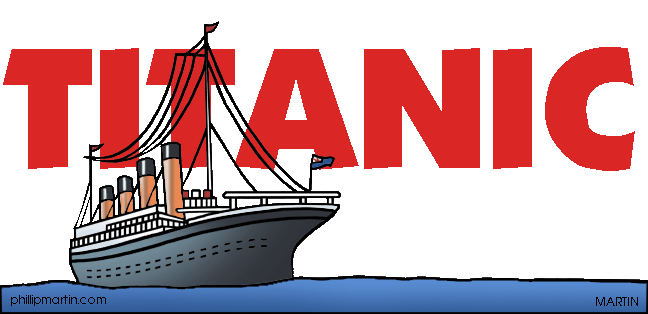

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv("/Users/macbook/Documents/datasets/datasets for projects/titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Checking num of rows and columns
df.shape

(418, 12)

In [4]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Issues in datatypes of few columns.

In [5]:
# Mathematical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# Cheking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Data is missing in Age, Fare, Cabin column

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
# Analyzing correlation between columns
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


## Changing datatypes of Columns

In [9]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Handling missing data

In [10]:
# Age missing data can be filled with mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
# Dropping Cabin column due to lot of missing values
df.drop(columns = 'Cabin', inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

# Lets begin EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

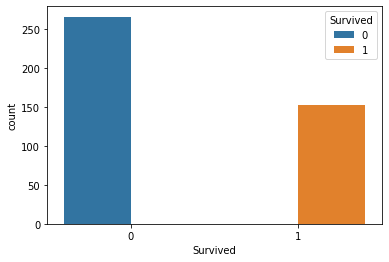

In [13]:
sns.countplot(x = 'Survived', hue='Survived', data=df)

266 people died while 152 survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

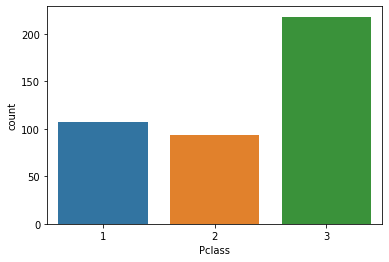

In [14]:
sns.countplot(x = 'Pclass', data=df)

Majority of people were traveling in Pclass 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

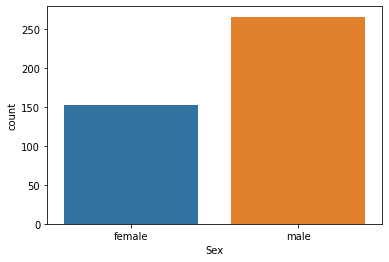

In [15]:
sns.countplot(x = 'Sex', data=df)

Males have more presence than females

<AxesSubplot:xlabel='Embarked', ylabel='count'>

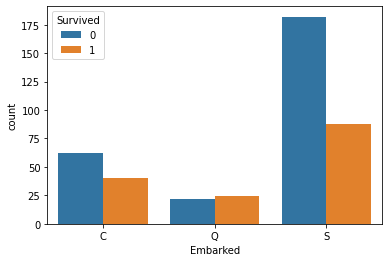

In [16]:
sns.countplot(x = 'Embarked', hue='Survived', data=df)

Most people were traveling towards south. People who were going towards Q, survived more

Text(0.5, 1.0, 'Number of People Survived vs Dead')

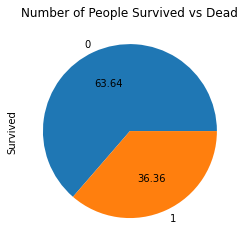

In [17]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Number of People Survived vs Dead')

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

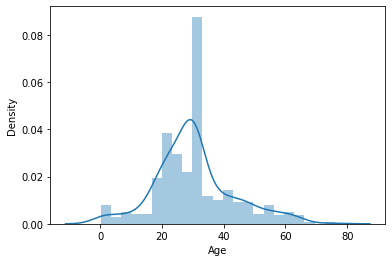

In [18]:
sns.distplot(df['Age'])

Majority consist of young people between 20-40

<AxesSubplot:xlabel='Age', ylabel='Density'>

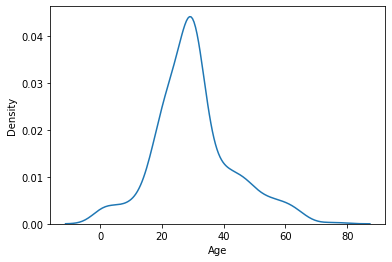

In [19]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

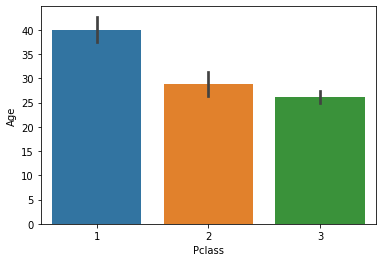

In [20]:
sns.barplot(x = 'Pclass', y = 'Age', data=df)

Pclass 1 had older people as compared to other Pclass 2 and 3

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

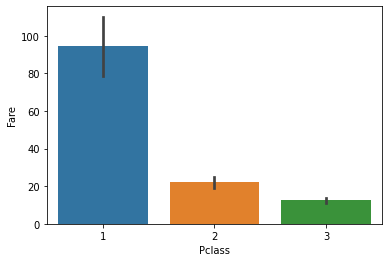

In [21]:
sns.barplot(x = 'Pclass', y = 'Fare', data=df)

There was a significant difference between fare of Pclass 1 and 2. 
But fares of Pclass 2,3 were quite close that's why most people opted Pclass 2.

<AxesSubplot:xlabel='Age', ylabel='Density'>

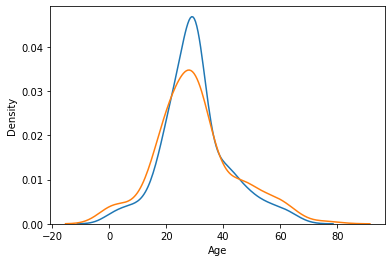

In [22]:
sns.kdeplot(x = df[df['Survived']==0]['Age'])
sns.kdeplot(x = df[df['Survived']==1]['Age'])

Probability of dying in teens and old people is small. Whereas between age 20-40 probability of dying is greater.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

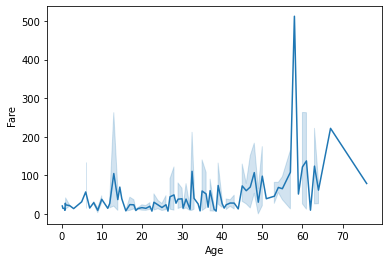

In [23]:
sns.lineplot(x = 'Age', y = 'Fare', data=df)

Older people payed high fare.